In [241]:
import random
import warnings
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from collections import OrderedDict

%matplotlib inline
warnings.filterwarnings('ignore')

In [242]:
def init_graph(n, weight=1):
    G = nx.Graph()
    G.add_nodes_from(range(n), weight=weight)
    
    return G

In [243]:
def create_graph(n, fn):
    # Create graph with given number of nodes
    G = init_graph(n)
    
    # While G is not connected
    while not fn(G):
        # Create a bag with nodes, each node has as many elements as its weight
        probs = [[node] * G.node[node]['weight'] for node in G.nodes]
        
        # Flatten the list
        probs = [y for x in probs for y in x]
        
        # Pick a node from G and a node from probality list
        a, b = random.choice(list(G)), random.choice(probs)
        
        # Add edge
        G.add_edge(a, b)
        
        try:
            # Try to find a cycle
            nx.find_cycle(G)
        
            # If so, remove the selected edge
            G.remove_edge(a, b)
        except:
            # Else, increment weight of nodes
            G.node[a]['weight'] += 1 
            G.node[b]['weight'] += 1
            
    return G

In [244]:
def create_preferential(n, fn):
    ct = Counter([degree for (node, degree) in create_graph(n, fn).degree()])
    
    return OrderedDict(sorted(ct.items()))

In [245]:
def draw_graph(G, output_dir=None):
    nx.draw(G)
    
    if output_dir is not None:
        plt.savefig(output_dir)

In [246]:
def draw_plot(x, y, figsize=(14, 8), output_dir=None):
    plt.figure(figsize=figsize)
    plt.xlabel('Degree')
    plt.ylabel('Nodes')
    
    plt.grid(True)
    
    plt.plot(x, y, marker='o', color='r')
    
    if output_dir is not None:
        plt.savefig(output_dir)

In [247]:
def main():
    nodes = 100
    cond = lambda x : nx.is_connected(x)
    
    print('Running for {} nodes...'.format(nodes))
    
    results = create_preferential(nodes, cond)
    
    for k, v in results.items():
        print('{:>1} degree => {:>2} total'.format(k, v))
    
    x, y = zip(*results.items())
    
    draw_plot(x, y)

Running for 100 nodes...
1 degree => 50 total
2 degree => 20 total
3 degree => 17 total
4 degree =>  9 total
5 degree =>  3 total
6 degree =>  1 total


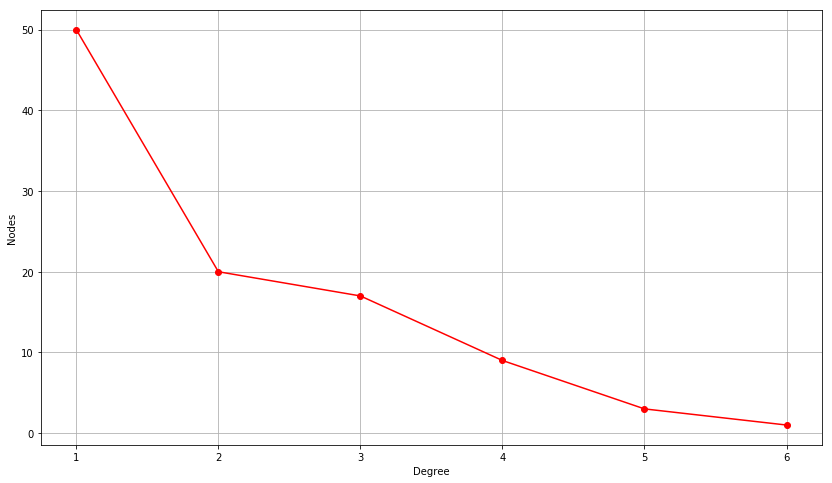

In [248]:
if __name__ == '__main__':
    main()